In [15]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('./data/train.csv')

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
train_df = train_df.drop(['PassengerId', 'Name','Ticket', 'Fare' ], axis = 1)

In [23]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [25]:
#성별로 나눠보기
men = train_df[train_df['Sex']=='male'].copy()
women = train_df[train_df['Sex'] == 'female'].copy()

<AxesSubplot:>

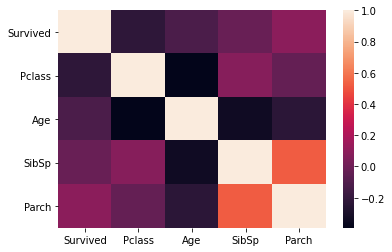

In [28]:
import seaborn as sns

corr = men.corr()
sns.heatmap(corr)

In [ ]:
sns.pairplot(men)

<AxesSubplot:>

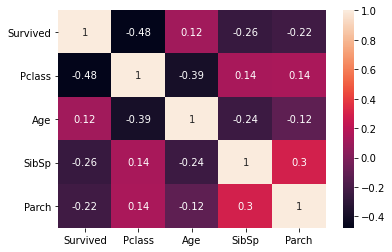

In [37]:
corr = women.corr()
sns.heatmap(corr, annot = corr )

In [34]:
x = men.iloc[:,0] # men -생존
x = men.iloc[:,1:] # men - 생존 제외

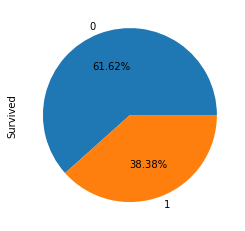

In [96]:
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

In [51]:
import matplotlib.pyplot as plt
new = train_df.groupby('Sex').mean()
new

,Survived,Pclass,Age,SibSp,Parch
Sex,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682
male,0.188908,2.389948,30.726645,0.429809,0.235702


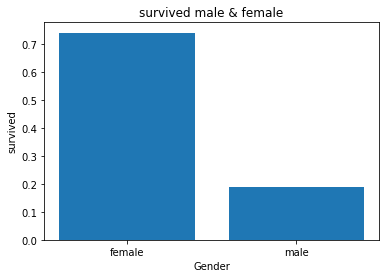

In [54]:
# 성별 생존 비율
plt.bar(new.index, new['Survived'])
plt.title('survived male & female')
plt.xlabel('Gender')
plt.ylabel('survived')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

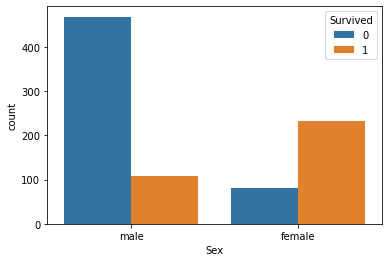

In [105]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

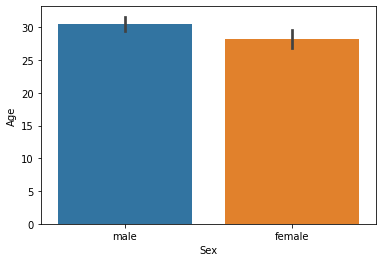

In [116]:
sns.barplot(x='Sex', y='Age', data=train_df)
plt.show()

In [58]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [62]:
y = train_df['Survived'].copy()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

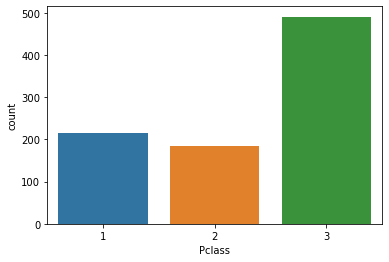

In [69]:
# Pclass 각 비율 확인
sns.countplot(x='Pclass', data = train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

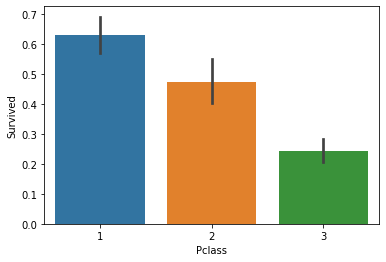

In [70]:
# Pclass 별 생존률 확인
sns.barplot(x= 'Pclass', y = 'Survived', data = train_df)

In [74]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [78]:
# Age null 갯수 확인
train_df['Age'].isnull().sum()

177

In [80]:
# 평균으로 null 값 채우기
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [82]:
train_df['Age'].isnull().sum()

0

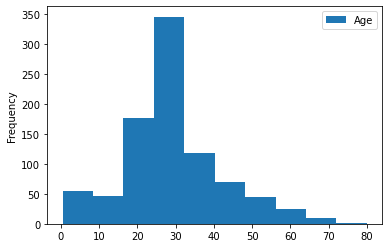

In [119]:
# 연령별
df_age = pd.DataFrame(train_df, columns = ['Age'])
age_hist = df_age.plot.hist(bins=10)
plt.show()

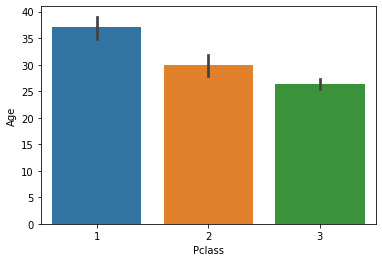

In [114]:
sns.barplot(x='Pclass', y='Age', data=train_df)
plt.show()

In [125]:
fig, ax = plt.subplots()
sns.displot(men[men['Survived']==1].Age )
sns.displot(men[men['Survived']==1].Age )

NameError: name 'axes' is not defined